# Lipstick is not just "red." 

For those unfamiliar with the world of cosmetics, it might be puzzling why some women own multiple lipsticks that seem to all fall under the "red" category. However, the reality is far more nuanced. Women who invest in various lipsticks don't perceive them as the same "red." 

These shades differ in ways that are deeply tied to color theory, specifically RGB values, which can objectively explain why each shade stands apart. To demonstrate this, I analyzed lipstick color data and divided the shades into two groups: **red-dominant** and **not red-dominant**.

The raw data used in this project was sourced from the GitHub repository [Lipsticks Detect](https://github.com/theBigDataDigest/lipsticks_detect) by [The Big Data Digest](https://github.com/theBigDataDigest).

In [50]:
import json

with open('lipsticks_detect/lipstick.json', 'r') as file:
    data = json.load(file)

# Display the data structure
print(json.dumps(data, indent=2))

{
  "brands": [
    {
      "name": "\u5723\u7f57\u5170",
      "series": [
        {
          "name": "\u83b9\u4eae\u7eaf\u9b45\u5507\u818f",
          "lipsticks": [
            {
              "color": "#D62352",
              "id": "49",
              "name": "\u64a9\u9a9a"
            },
            {
              "color": "#DC4B41",
              "id": "14",
              "name": "\u4e00\u89c1\u503e\u5fc3"
            },
            {
              "color": "#B22146",
              "id": "05",
              "name": "\u6d6e\u751f\u82e5\u68a6"
            },
            {
              "color": "#A25356",
              "id": "08",
              "name": "\u7eaf\u771f\u68a6\u5e7b"
            },
            {
              "color": "#DF3443",
              "id": "12",
              "name": "\u7ea2\u7c89\u6d3e\u5bf9"
            },
            {
              "color": "#E06C68",
              "id": "15",
              "name": "\u73ca\u745a\u604b\u4eba"
            },
            {
 

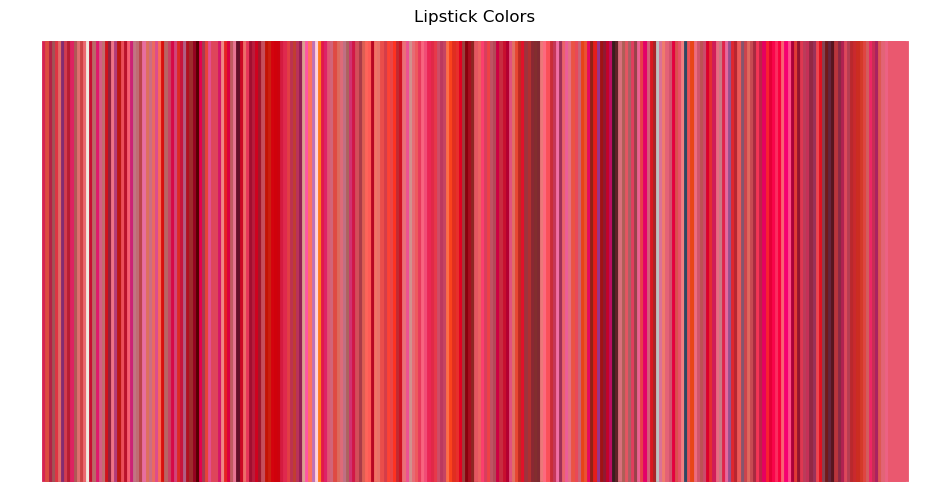

In [51]:
# Extract HEX colors
hex_colors = []
for brand in data['brands']:
    for series in brand['series']:
        for lipstick in series['lipsticks']:
            hex_colors.append(lipstick['color'])

# Plot the colors
plt.figure(figsize=(12, 6))
for i, hex_color in enumerate(hex_colors):
    plt.plot([i, i], [0, 1], color=hex_color, linewidth=15)
plt.axis('off')
plt.title("Lipstick Colors")
plt.show()

# Analyzing Lipstick Shades Using RGB Components

To classify lipstick shades, I defined a simple function based on the RGB (Red, Green, Blue) color model. 

A shade is considered red-dominant if its **red (R) value is significantly greater than its green (G) and blue (B) values**. Specifically, I used a threshold where **the red value is at least 1.5 times greater than the green and blue values**. Lipstick shades that do not meet this criterion fall into the **not red-dominant** group.

Here’s how I implemented the analysis:

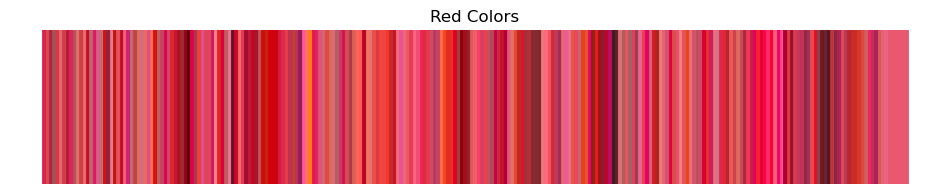

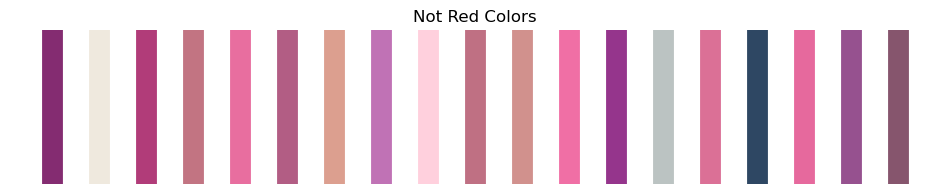

In [52]:
import json
import matplotlib.pyplot as plt

# Function to determine if a color is red
def is_red(hex_color):
    # Convert HEX to RGB
    hex_color = hex_color.lstrip('#')
    r, g, b = int(hex_color[:2], 16), int(hex_color[2:4], 16), int(hex_color[4:], 16)
    # Classify as red if R is significantly greater than G and B
    return r > 1.5 * g and r > 1.5 * b

# Load the dataset
with open('lipsticks_detect/lipstick.json', 'r') as file:
    data = json.load(file)

# Group colors
red_colors = []
not_red_colors = []

for brand in data['brands']:
    for series in brand['series']:
        for lipstick in series['lipsticks']:
            color = lipstick['color']
            if is_red(color):
                red_colors.append(color)
            else:
                not_red_colors.append(color)

# Plot grouped colors
# Red group
plt.figure(figsize=(12, 2))
for i, color in enumerate(red_colors):
    plt.plot([i, i], [0, 1], color=color, linewidth=15)
plt.axis('off')
plt.title("Red Colors")
plt.show()

# Not red group
plt.figure(figsize=(12, 2))
for i, color in enumerate(not_red_colors):
    plt.plot([i, i], [0, 1], color=color, linewidth=15)
plt.axis('off')
plt.title("Not Red Colors")
plt.show()

# Refine **"Red"**

Initially, the simple condition that red must be 1.5 times greater than green and blue was effective for many cases, but **it misclassified certain non-red shades like yellows, oranges, and dark purples** as **red-dominant**. To fine-tune the classification, additional conditions were introduced:

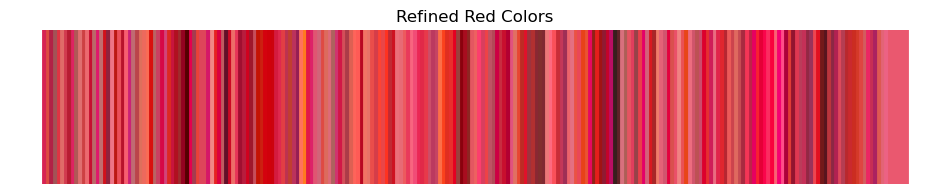

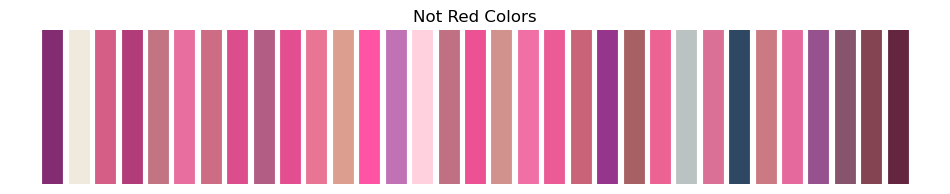

In [53]:
# Adjusted function to determine if a color is "red"
def is_red(hex_color):
    # Convert HEX to RGB
    hex_color = hex_color.lstrip('#')
    r, g, b = int(hex_color[:2], 16), int(hex_color[2:4], 16), int(hex_color[4:], 16)
    
    # Define conditions for a color to be "red"
    # 1. Red must be significantly higher than green and blue
    # 2. Green and blue should not exceed 0.6 times red
    # 3. (Optional) Exclude very dark or very light colors
    return (
        r > 1.5 * g and  # Red dominance
        r > 1.5 * b and  # Red dominance
        g < 0.6 * r and  # Exclude yellow/orange tones
        b < 0.6 * r      # Exclude purple/blue tones
    )

# Load the dataset
with open('lipsticks_detect/lipstick.json', 'r') as file:
    data = json.load(file)

# Group colors
red_colors = []
not_red_colors = []

for brand in data['brands']:
    for series in brand['series']:
        for lipstick in series['lipsticks']:
            color = lipstick['color']
            if is_red(color):
                red_colors.append(color)
            else:
                not_red_colors.append(color)

# Plot grouped colors
# Red group
plt.figure(figsize=(12, 2))
for i, color in enumerate(red_colors):
    plt.plot([i, i], [0, 1], color=color, linewidth=15)
plt.axis('off')
plt.title("Refined Red Colors")
plt.show()

# Not red group
plt.figure(figsize=(12, 2))
for i, color in enumerate(not_red_colors):
    plt.plot([i, i], [0, 1], color=color, linewidth=15)
plt.axis('off')
plt.title("Not Red Colors")
plt.show()

# Tuning color group 1st Time

The previous refinements significantly improved the accuracy of identifying red-dominant lipstick shades. However, some edge cases, such as **borderline oranges or purples, still persisted**. To address this, the function was enhanced to include tunable parameters that allow more precise control over what qualifies as "red."

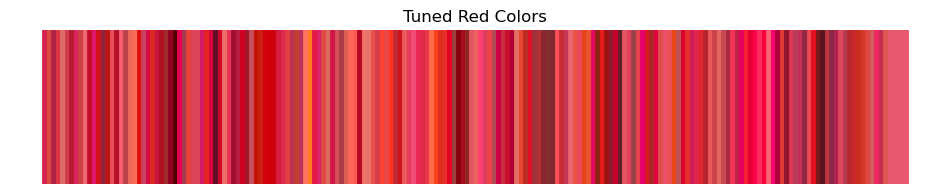

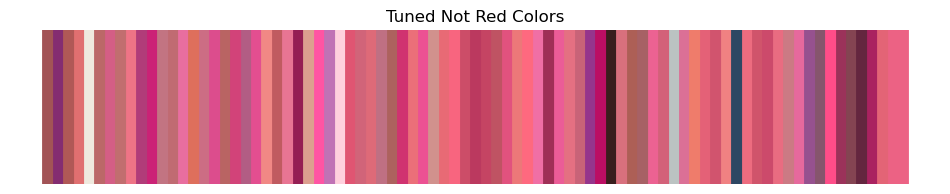

In [54]:
# Function to determine if a color is "red" with tunable thresholds
def is_red(hex_color, red_dominance=1.5, max_green_ratio=0.6, max_blue_ratio=0.6):
    # Convert HEX to RGB
    hex_color = hex_color.lstrip('#')
    r, g, b = int(hex_color[:2], 16), int(hex_color[2:4], 16), int(hex_color[4:], 16)
    
    # Define conditions for a color to be "red"
    return (
        r > red_dominance * g and  # Red dominance over green
        r > red_dominance * b and  # Red dominance over blue
        g < max_green_ratio * r and  # Green must be within the threshold
        b < max_blue_ratio * r      # Blue must be within the threshold
    )

# Load the dataset
with open('lipsticks_detect/lipstick.json', 'r') as file:
    data = json.load(file)

# Parameters for tuning
red_dominance = 1.7  # Red must be at least 1.7x green and blue
max_green_ratio = 0.5  # Green must be less than 50% of red
max_blue_ratio = 0.5  # Blue must be less than 50% of red

# Group colors
red_colors = []
not_red_colors = []

for brand in data['brands']:
    for series in brand['series']:
        for lipstick in series['lipsticks']:
            color = lipstick['color']
            if is_red(color, red_dominance, max_green_ratio, max_blue_ratio):
                red_colors.append(color)
            else:
                not_red_colors.append(color)

# Plot grouped colors
# Red group
plt.figure(figsize=(12, 2))
for i, color in enumerate(red_colors):
    plt.plot([i, i], [0, 1], color=color, linewidth=15)
plt.axis('off')
plt.title("Tuned Red Colors")
plt.show()

# Not red group
plt.figure(figsize=(12, 2))
for i, color in enumerate(not_red_colors):
    plt.plot([i, i], [0, 1], color=color, linewidth=15)
plt.axis('off')
plt.title("Tuned Not Red Colors")
plt.show()

# Finalizaing the tuning of "Red"

After further tuning, I observed that some non-red shades still appeared in the red-dominant group. To address this, I applied even stricter thresholds, focusing on minimizing any overlap with non-red colors. The updated function now includes:

1. Stronger Red Dominance Ratio (red_dominance=2.0):
Red must be at least twice as strong as green and blue, making it nearly impossible for borderline shades like orange or purple to pass as red.

2. Tighter Green and Blue Limits (max_green_ratio=0.4 and max_blue_ratio=0.3):
These stricter ratios further exclude colors with even minor influences from green or blue, ensuring only highly pure or intense reds are classified.

3. Minimizing False Positives:
By focusing on edge cases and revising thresholds iteratively, the function now captures a more accurate and consistent definition of red-dominant shades.

This final tuning step produced results that align with **my perception of red**. Both the red-dominant and not-red-dominant groups now display clearer distinctions, leading to better insights and an end result that feels both precise and reliable. This iterative process demonstrates the importance of refinement in data analysis, especially when dealing with subjective concepts like color classification.

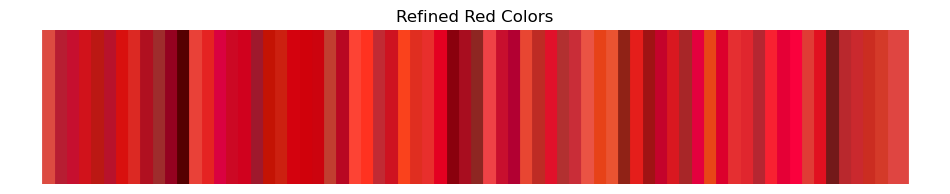

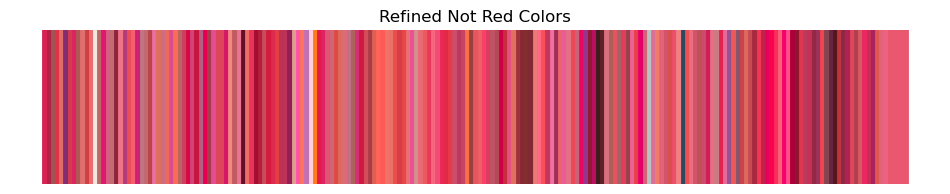

In [85]:
# Function to determine if a color is "red" with stricter thresholds
def is_red(hex_color, red_dominance=2.0, max_green_ratio=0.4, max_blue_ratio=0.3):
    # Convert HEX to RGB
    hex_color = hex_color.lstrip('#')
    r, g, b = int(hex_color[:2], 16), int(hex_color[2:4], 16), int(hex_color[4:], 16)
    
    # Define conditions for a color to be "red"
    return (
        r > red_dominance * g and  # Red dominance over green
        r > red_dominance * b and  # Red dominance over blue
        g < max_green_ratio * r and  # Green must be minimal
        b < max_blue_ratio * r      # Blue must be minimal
    )

# Load the dataset
with open('lipsticks_detect/lipstick.json', 'r') as file:
    data = json.load(file)

# Adjusted parameters for tuning
red_dominance = 2.0  # Stricter dominance of red
max_green_ratio = 0.4  # Reduce yellows
max_blue_ratio = 0.3  # Reduce blues

# Group colors
red_colors = []
not_red_colors = []

for brand in data['brands']:
    for series in brand['series']:
        for lipstick in series['lipsticks']:
            color = lipstick['color']
            if is_red(color, red_dominance, max_green_ratio, max_blue_ratio):
                red_colors.append(color)
            else:
                not_red_colors.append(color)

# Plot refined red colors
plt.figure(figsize=(12, 2))
for i, color in enumerate(red_colors):
    plt.plot([i, i], [0, 1], color=color, linewidth=15)
plt.axis('off')
plt.title("Refined Red Colors")
plt.show()

# Plot refined not red colors
plt.figure(figsize=(12, 2))
for i, color in enumerate(not_red_colors):
    plt.plot([i, i], [0, 1], color=color, linewidth=15)
plt.axis('off')
plt.title("Refined Not Red Colors")
plt.show()

# Visualizing the Distribution of Red-Dominant and Not-Red Lipstick Shades by Brand

To assess the proportion of red-dominant and not-red-dominant lipsticks for each brand, I grouped the data by brand and categorized the lipstick shades. 
**The goal was to evaluate how brands allocate their lipstick shades, which may reveal patterns or strategies in targeting specific customer preferences.**

**Limitation:**
The current code does not support brand names in languages other than English. 
To address this, a text normalization step could be introduced, such as transliterating or encoding non-English characters. This would make the visualization more inclusive and usable for international datasets.

/var/folders/qc/mbhyd3n52jxfyjs1_17bq8s00000gn/T/ipykernel_30676/357547007.py:35: UserWarning: Glyph 22307 (\N{CJK UNIFIED IDEOGRAPH-5723}) missing from current font.
  plt.tight_layout()
/var/folders/qc/mbhyd3n52jxfyjs1_17bq8s00000gn/T/ipykernel_30676/357547007.py:35: UserWarning: Glyph 32599 (\N{CJK UNIFIED IDEOGRAPH-7F57}) missing from current font.
  plt.tight_layout()
/var/folders/qc/mbhyd3n52jxfyjs1_17bq8s00000gn/T/ipykernel_30676/357547007.py:35: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  plt.tight_layout()
/var/folders/qc/mbhyd3n52jxfyjs1_17bq8s00000gn/T/ipykernel_30676/357547007.py:35: UserWarning: Glyph 39321 (\N{CJK UNIFIED IDEOGRAPH-9999}) missing from current font.
  plt.tight_layout()
/var/folders/qc/mbhyd3n52jxfyjs1_17bq8s00000gn/T/ipykernel_30676/357547007.py:35: UserWarning: Glyph 22856 (\N{CJK UNIFIED IDEOGRAPH-5948}) missing from current font.
  plt.tight_layout()
/var/folders/qc/mbhyd3n52jxfyjs1_17bq8s00000gn/T/ipykernel_3

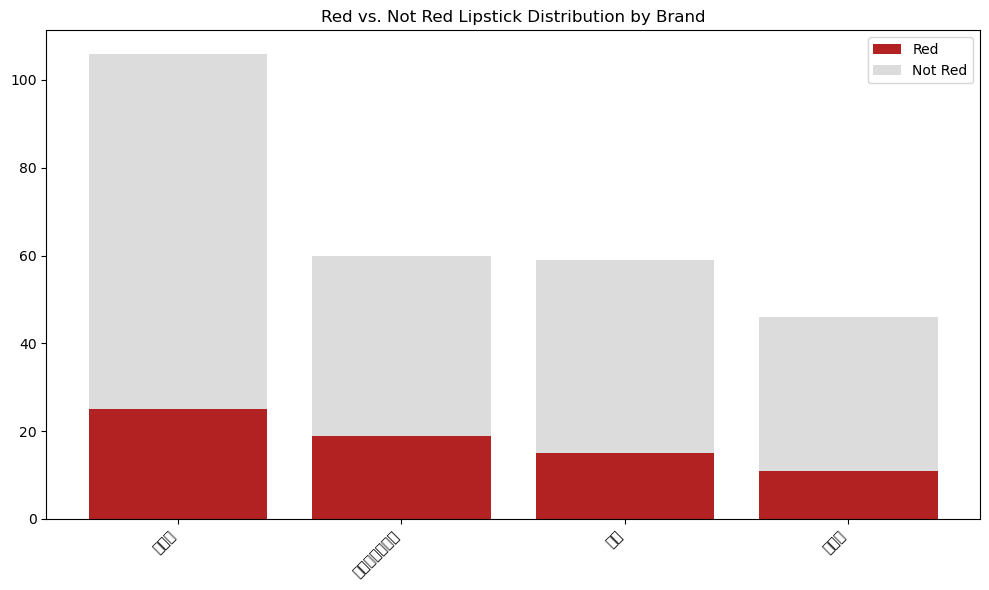

In [87]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to group lipsticks by color category for each brand
def brand_level_analysis(data, red_dominance=2.0, max_green_ratio=0.4, max_blue_ratio=0.3):
    brand_colors = defaultdict(lambda: {"red": 0, "not_red": 0})
    
    for brand in data['brands']:
        brand_name = brand['name']
        for series in brand['series']:
            for lipstick in series['lipsticks']:
                color = lipstick['color']
                if is_red(color, red_dominance, max_green_ratio, max_blue_ratio):
                    brand_colors[brand_name]["red"] += 1
                else:
                    brand_colors[brand_name]["not_red"] += 1
    return brand_colors

# Analyze the data
brand_colors = brand_level_analysis(data)

# Prepare data for plotting
brands = list(brand_colors.keys())
red_counts = [brand_colors[brand]["red"] for brand in brands]
not_red_counts = [brand_colors[brand]["not_red"] for brand in brands]

x = range(len(brands))
plt.figure(figsize=(10, 6))
plt.bar(x, red_counts, color='firebrick', label='Red')
plt.bar(x, not_red_counts, bottom=red_counts, color='gainsboro', label='Not Red')
plt.xticks(x, brands, rotation=45, ha='right')
plt.title("Red vs. Not Red Lipstick Distribution by Brand")
plt.ylabel("")
plt.legend()
plt.tight_layout()
plt.show()

# Enhancing Visualization with Proper Brand Name Rendering

To ensure the accurate representation of brand names in the visualization, particularly for datasets that include non-English or Unicode characters, I introduced a normalization step using Python's unicodedata library. This process standardizes brand names to their canonical form, avoiding potential rendering issues caused by character encoding discrepancies.

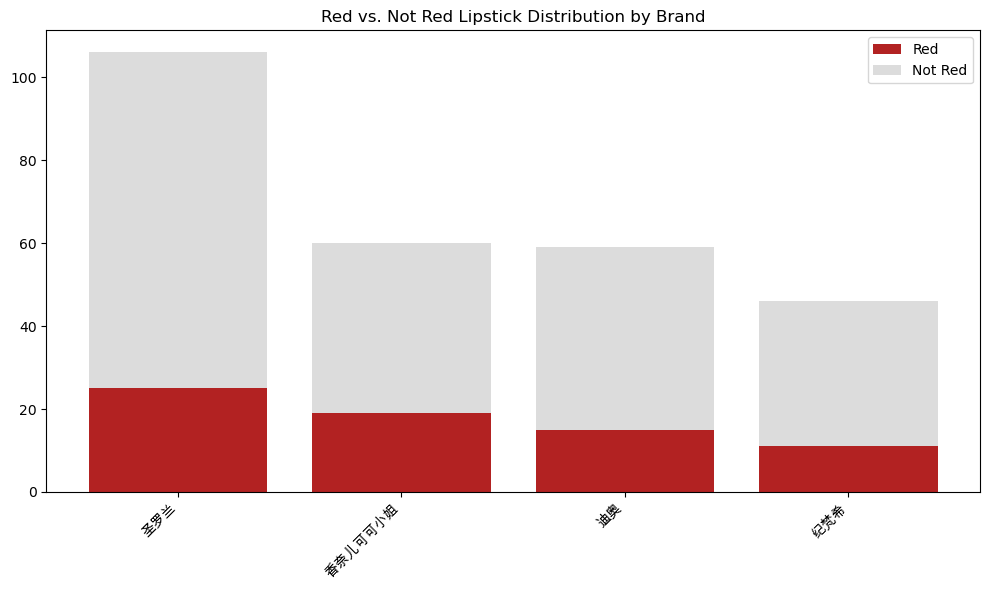

In [88]:
import unicodedata

# Decode the brand names to ensure proper rendering
brands = [unicodedata.normalize('NFKC', brand) for brand in brands]

# Update the plot
x = range(len(brands))
plt.figure(figsize=(10, 6))
plt.bar(x, red_counts, color='firebrick', label='Red')
plt.bar(x, not_red_counts, bottom=red_counts, color='gainsboro', label='Not Red')
plt.xticks(x, brands, rotation=45, ha='right', fontname="Arial Unicode MS")  # Ensure proper font rendering
plt.title("Red vs. Not Red Lipstick Distribution by Brand")
plt.ylabel("")
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


# Visualizing Brand Lipstick Portfolios with a Marimekko Chart

To analyze the distribution of red-dominant and not-red lipstick shades across brands in a visually impactful way, I created a Marimekko chart.

**Width Proportions**: </br>
Each brand's width in the chart corresponds to its total lipstick portfolio (sum of red and not-red counts), normalized against the total portfolio size. 

**Height Proportions**: </br>
Within each brand, the height of the red segment represents the proportion of red lipsticks, and the remaining height represents the proportion of not-red lipsticks.

The analysis shows that **not-red-dominant** shades lead in popularity across most brands, reflecting a shift towards diverse and modern preferences. Brands like St. Lauren and Dior, with a higher proportion of not-red shades, cater to customers seeking subtle, versatile, or experimental colors. This trend highlights an opportunity for brands to innovate within non-red categories to stay relevant and attract trend-conscious consumers. Expanding not-red offerings can differentiate brands in competitive markets and capture broader audience segments. Investing in unique not-red shades could align with evolving consumer demands for variety and personalization.

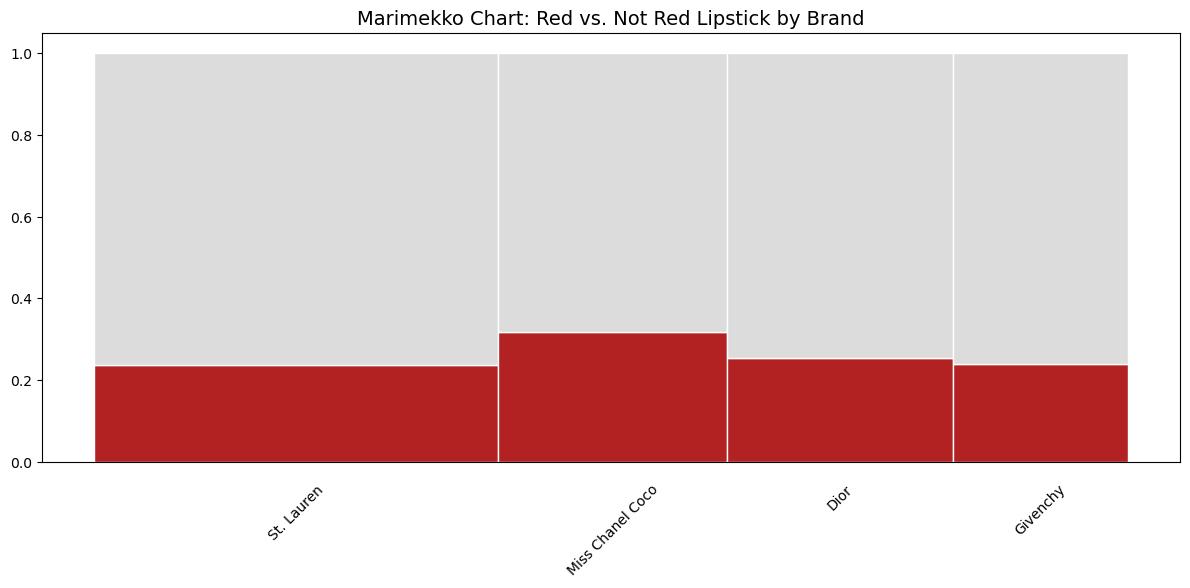

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from googletrans import Translator

# Initialize the translator
translator = Translator()

# Translate brand names from Chinese to English
translated_brands = [translator.translate(brand, src='zh-CN', dest='en').text for brand in brands]

# Calculate the proportions for the Marimekko chart
total_counts = np.array([red_counts[i] + not_red_counts[i] for i in range(len(brands))])
total_portfolio = np.sum(total_counts)

# Proportions for width and height
widths = total_counts / total_portfolio  # Proportions for brand width
heights_red = np.array(red_counts) / total_counts  # Proportion of red within each brand
heights_not_red = 1 - heights_red  # Proportion of not-red within each brand

# Define the cumulative width for each brand
cumulative_widths = np.cumsum(np.concatenate([[0], widths[:-1]]))

# Plot the Marimekko chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, brand in enumerate(translated_brands):
    # Draw the red segment
    ax.bar(
        x=cumulative_widths[i],
        height=heights_red[i],
        width=widths[i],
        align='edge',
        color='firebrick',
        label='Red' if i == 0 else "",
        edgecolor='white'
    )
    # Draw the not-red segment
    ax.bar(
        x=cumulative_widths[i],
        height=heights_not_red[i],
        bottom=heights_red[i],
        width=widths[i],
        align='edge',
        color='gainsboro',
        label='Not Red' if i == 0 else "",
        edgecolor='white'
    )
    # Annotate the brand names
    ax.text(
        cumulative_widths[i] + widths[i] / 2,
        -0.05,
        brand,
        ha='center',
        va='top',
        rotation=45,
        fontsize=10
    )

ax.set_title("Marimekko Chart: Red vs. Not Red Lipstick by Brand", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_xticks([])
plt.tight_layout()
plt.show()

# Visualizing Brand Series Lipstick Portfolios with a Marimekko Chart

Most lipstick series prioritize **not-red-dominant** shades, reflecting customer demand for variety and versatility. This trend indicates that series are designed to cater to modern preferences, emphasizing subtle or unique tones over traditional reds. The distribution highlights an opportunity for brands to innovate further within non-red categories, as these are key to attracting a broader consumer base. Additionally, offering diverse not-red shades across series aligns with evolving market trends toward personalized and experimental products. Focusing on not-red dominance in series could strengthen brand appeal and market competitiveness.

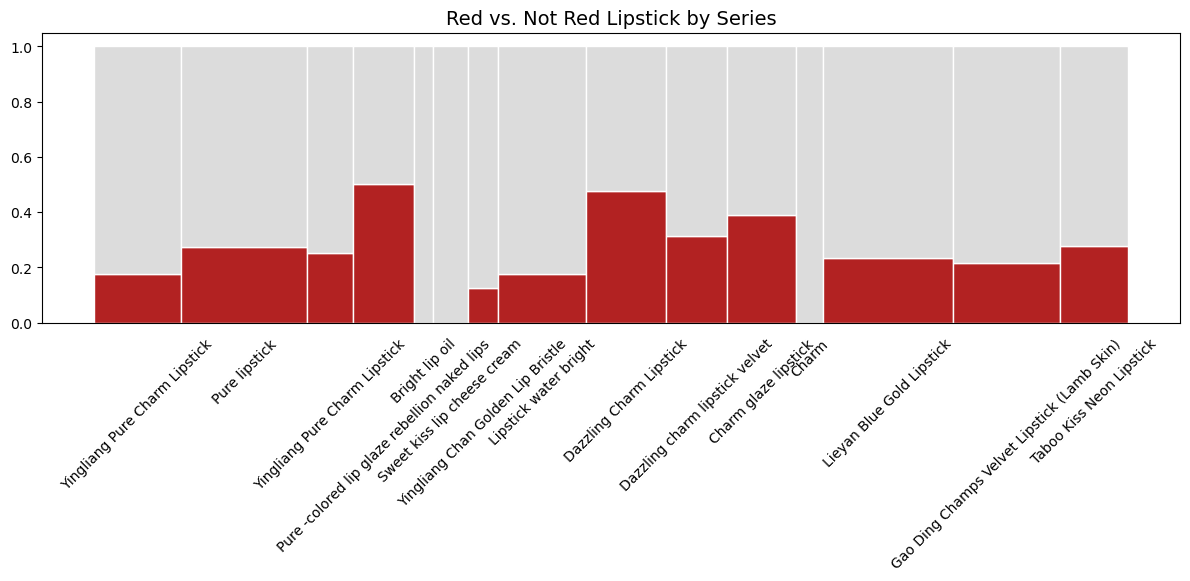

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from googletrans import Translator
from collections import defaultdict

# Initialize the translator
translator = Translator()

# Function to group lipsticks by color category for each series
def series_level_analysis(data, red_dominance=2.0, max_green_ratio=0.4, max_blue_ratio=0.3):
    series_colors = defaultdict(lambda: {"red": 0, "not_red": 0})
    
    for brand in data['brands']:
        for series in brand['series']:
            series_name = series['name']
            for lipstick in series['lipsticks']:
                color = lipstick['color']
                if is_red(color, red_dominance, max_green_ratio, max_blue_ratio):
                    series_colors[series_name]["red"] += 1
                else:
                    series_colors[series_name]["not_red"] += 1
    return series_colors

# Analyze the data
series_colors = series_level_analysis(data)

# Translate series names to English
series = list(series_colors.keys())
translated_series = [translator.translate(s, src='zh-CN', dest='en').text for s in series]

# Prepare data for Marimekko chart
total_counts = np.array([series_colors[series_name]["red"] + series_colors[series_name]["not_red"] for series_name in series])
total_portfolio = np.sum(total_counts)

# Proportions for width and height
widths = total_counts / total_portfolio  # Proportions for series width
heights_red = np.array([series_colors[series_name]["red"] for series_name in series]) / total_counts  # Proportion of red
heights_not_red = 1 - heights_red  # Proportion of not-red

# Define the cumulative width for each series
cumulative_widths = np.cumsum(np.concatenate([[0], widths[:-1]]))

# Plot the Marimekko chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, series_name in enumerate(translated_series):
    # Draw the red segment
    ax.bar(
        x=cumulative_widths[i],
        height=heights_red[i],
        width=widths[i],
        align='edge',
        color='firebrick',
        label='Red' if i == 0 else "",
        edgecolor='white'
    )
    # Draw the not-red segment
    ax.bar(
        x=cumulative_widths[i],
        height=heights_not_red[i],
        bottom=heights_red[i],
        width=widths[i],
        align='edge',
        color='gainsboro',
        label='Not Red' if i == 0 else "",
        edgecolor='white'
    )
    # Annotate the series names
    ax.text(
        cumulative_widths[i] + widths[i] / 2,
        -0.05,
        series_name,
        ha='center',
        va='top',
        rotation=45,
        fontsize=10
    )

ax.set_title("Red vs. Not Red Lipstick by Series", fontsize=14)
ax.set_xticks([])
plt.tight_layout()
plt.show()

# Dominant Lipstick Shades: Red vs. Not-Red Group Analysis

# K-Means Clustering

The code utilizes K-Means clustering to group lipstick colors into **5 dominant clusters** for both **red** and **not-red** groups. This method effectively reduces the complexity of analyzing individual shades by summarizing them into meaningful color groups.

# Dominant Shades Distribution

The top shades in the **red** group are evenly distributed, with each contributing around **20%-25%**. In contrast, the **not-red** group is more skewed, with one shade (Shade 1) dominating at nearly **40%**.

The **not-red** group shows a significantly higher concentration in one dominant shade, suggesting a preference for fewer standout colors. Conversely, the **red** group demonstrates a more balanced diversity across shades.

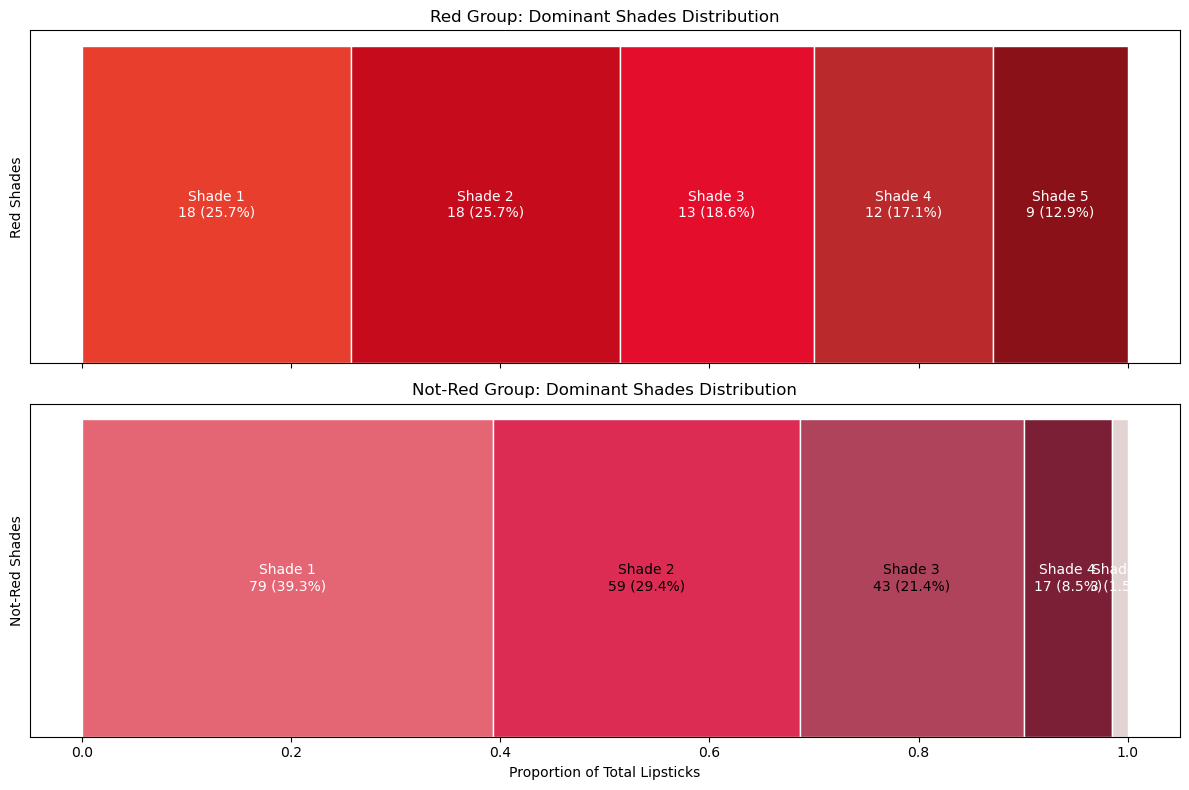

In [84]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Convert HEX colors to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return [int(hex_color[i:i+2], 16) for i in (0, 2, 4)]

# Prepare RGB data for red and not-red groups
rgb_red = np.array([hex_to_rgb(color) for color in red_colors])
rgb_not_red = np.array([hex_to_rgb(color) for color in not_red_colors])

# Perform k-means clustering
kmeans_red = KMeans(n_clusters=5, random_state=42, n_init=10).fit(rgb_red)
kmeans_not_red = KMeans(n_clusters=5, random_state=42, n_init=10).fit(rgb_not_red)

# Count the number of lipsticks in each cluster for both groups
cluster_counts_red = Counter(kmeans_red.labels_)
cluster_counts_not_red = Counter(kmeans_not_red.labels_)

# Convert cluster centers to HEX
def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

hex_colors_red = [rgb_to_hex(center) for center in kmeans_red.cluster_centers_]
hex_colors_not_red = [rgb_to_hex(center) for center in kmeans_not_red.cluster_centers_]

# Sort clusters by count (descending order) for both groups
sorted_clusters_red = sorted(cluster_counts_red.items(), key=lambda x: x[1], reverse=True)
sorted_clusters_not_red = sorted(cluster_counts_not_red.items(), key=lambda x: x[1], reverse=True)

sorted_counts_red = [count for _, count in sorted_clusters_red]
sorted_counts_not_red = [count for _, count in sorted_clusters_not_red]

sorted_hex_colors_red = [hex_colors_red[cluster] for cluster, _ in sorted_clusters_red]
sorted_hex_colors_not_red = [hex_colors_not_red[cluster] for cluster, _ in sorted_clusters_not_red]

# Calculate proportions
total_count_red = sum(sorted_counts_red)
total_count_not_red = sum(sorted_counts_not_red)

widths_red = np.array(sorted_counts_red) / total_count_red
widths_not_red = np.array(sorted_counts_not_red) / total_count_not_red

cumulative_widths_red = np.cumsum(np.concatenate([[0], widths_red[:-1]]))
cumulative_widths_not_red = np.cumsum(np.concatenate([[0], widths_not_red[:-1]]))

# Plot the Marimekko charts
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Red Group
for i, (hex_color, width, count) in enumerate(zip(sorted_hex_colors_red, widths_red, sorted_counts_red)):
    axes[0].bar(
        x=cumulative_widths_red[i],
        height=1,
        width=width,
        align='edge',
        color=hex_color,
        edgecolor='white'
    )
    axes[0].text(
        cumulative_widths_red[i] + width / 2,
        0.5,
        f"Shade {i+1}\n{count} ({width * 100:.1f}%)",
        ha='center',
        va='center',
        fontsize=10,
        color='white' if np.mean(kmeans_red.cluster_centers_[i]) < 128 else 'black'
    )
axes[0].set_title("Red Group: Dominant Shades Distribution")
axes[0].set_yticks([])
axes[0].set_ylabel("Red Shades")

# Not-Red Group
for i, (hex_color, width, count) in enumerate(zip(sorted_hex_colors_not_red, widths_not_red, sorted_counts_not_red)):
    axes[1].bar(
        x=cumulative_widths_not_red[i],
        height=1,
        width=width,
        align='edge',
        color=hex_color,
        edgecolor='white'
    )
    axes[1].text(
        cumulative_widths_not_red[i] + width / 2,
        0.5,
        f"Shade {i+1}\n{count} ({width * 100:.1f}%)",
        ha='center',
        va='center',
        fontsize=10,
        color='white' if np.mean(kmeans_not_red.cluster_centers_[i]) < 128 else 'black'
    )
axes[1].set_title("Not-Red Group: Dominant Shades Distribution")
axes[1].set_yticks([])
axes[1].set_ylabel("Not-Red Shades")

# Final layout
axes[1].set_xlabel("Proportion of Total Lipsticks")
plt.tight_layout()
plt.show()